# Validation

In [1]:
# Setting seeds to try and ensure we have the same results - this is not guaranteed across PyTorch releases.
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import numpy as np
np.random.seed(0)

In [2]:
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import nn

mean, std = (0.5,), (0.5,)

# Create a transform and normalise data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                              ])

# Download FMNIST training dataset and load training data
trainset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download FMNIST test dataset and load test data
testset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [3]:
class FMNIST(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,10)
    
  def forward(self, x):
    x = x.view(x.shape[0], -1)
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    
    return x

model = FMNIST()

In [4]:
from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 3

for i in range(num_epochs):
    cum_loss = 0

    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        cum_loss += loss.item()
     
    print(f"Training loss: {cum_loss/len(trainloader)}")

Training loss: 1.0338177432192923
Training loss: 0.5608134193143357
Training loss: 0.49143493810950567


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

images, labels = next(iter(testloader))

test_image_id = 0 
img = images[test_image_id].view(1, 784) 

with torch.no_grad():
    logps = model(img)

In [6]:
ps = torch.exp(logps)
ps

tensor([[1.4787e-06, 5.1537e-07, 8.3431e-06, 8.7248e-07, 5.9432e-06, 1.8999e-01,
         4.7754e-06, 1.6158e-01, 4.3407e-03, 6.4407e-01]])

In [7]:
nps = ps.numpy()[0]
nps

array([1.4786525e-06, 5.1537370e-07, 8.3430532e-06, 8.7248321e-07,
       5.9432150e-06, 1.8999216e-01, 4.7754206e-06, 1.6157575e-01,
       4.3407455e-03, 6.4406943e-01], dtype=float32)

<BarContainer object of 10 artists>

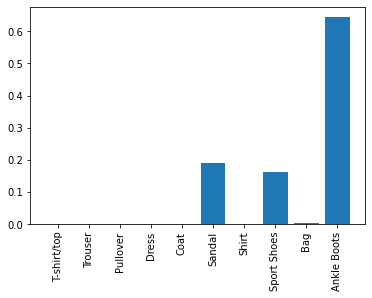

In [8]:
FMNIST_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sport Shoes','Bag','Ankle Boots']
plt.xticks(np.arange(10),labels=FMNIST_labels,rotation='vertical')
plt.bar(np.arange(10), nps)

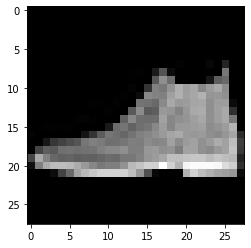

In [9]:
def denormalize(tensor):
  tensor = tensor*0.5 + 0.5
  return tensor
  
img = img.view(28,-1)
img = denormalize(img)
plt.imshow(img,cmap='gray')

In [10]:
with torch.no_grad():
    num_correct = 0
    total = 0

    cnt = 0
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        print(output)
        cnt+=1
        
        if cnt > 0:
          break

tensor([[1.4787e-06, 5.1537e-07, 8.3431e-06, 8.7248e-07, 5.9432e-06, 1.8999e-01,
         4.7754e-06, 1.6158e-01, 4.3407e-03, 6.4407e-01],
        [1.2095e-03, 4.7547e-05, 9.0694e-01, 1.9332e-04, 2.3503e-02, 1.1295e-05,
         6.6949e-02, 9.6613e-09, 1.1418e-03, 5.0548e-07],
        [1.1591e-05, 9.9983e-01, 2.9635e-05, 7.5339e-05, 5.5959e-05, 2.3393e-08,
         1.2227e-07, 4.7421e-07, 4.7005e-09, 9.1922e-09],
        [3.1152e-06, 9.9961e-01, 3.7383e-05, 3.0556e-04, 3.7357e-05, 1.6312e-07,
         9.5714e-08, 1.9866e-06, 9.4656e-09, 5.5269e-08],
        [1.1157e-01, 6.7073e-04, 1.7919e-01, 1.2622e-02, 1.5333e-02, 3.0339e-04,
         6.6984e-01, 1.5478e-06, 1.0454e-02, 1.5171e-05],
        [1.5485e-03, 9.8682e-01, 9.1340e-04, 1.9438e-03, 8.6747e-03, 5.6687e-07,
         9.2295e-05, 4.4265e-06, 1.5577e-06, 2.6561e-07],
        [1.0708e-02, 1.0734e-03, 5.5052e-02, 6.7131e-04, 7.9329e-01, 1.1967e-04,
         1.3719e-01, 7.8903e-07, 1.8945e-03, 1.2114e-06],
        [5.7440e-03, 3.8829

In [11]:
with torch.no_grad():
    num_correct = 0
    total = 0

    #set_trace()
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output, 1)
        total += labels.size(0)


In [12]:
pred, labels

(tensor([3, 3, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5]),
 tensor([3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5]))

In [13]:
pred == labels

tensor([ True, False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True])

In [14]:
with torch.no_grad():
    num_correct = 0
    total = 0

    #set_trace()
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output, 1)
        total += labels.size(0)
        num_correct += (pred == labels).sum().item()

    print(f'Accuracy of the model on the 10000 test images: {num_correct * 100 / total}% ')

Accuracy of the model on the 10000 test images: 81.73% 
